***

# Calcul Matriciel
## TP1. Graphs encodings

***
***

Basic and advanced encoding of graphs.
***
***
A few ground rules for your report:
* _your code must be clear, commented and use explicit variable names_
* _every algorithm must be tested on a few examples which show the different use cases_
* _markdown comments and examples must be provided, and the report should be self-contained_

In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#magic
import warnings
warnings.filterwarnings('ignore')


**_In this pratical, we will only deal with non-oriented graphs. It can be however interesting to notice what would work or fail in the oriented setting_**


The basic python's tool for matrices and linear algebra in numpy, we are going to use it a lot (but rarely in a complicated way)

reference: https://numpy.org/doc/stable/reference/routines.array-creation.html

***
## <font color=blue>Some adjacency matrices examples</font> ##
***

**To Do:**

**_question 1_**

Create a numpy array `B` representing the adjacency matrix of the Bull graph (cf CM1)

In [4]:
B=np.array([[0,1,0,0,0],[1,0,1,1,0],[0,1,0,1,0],[0,1,1,0,1],[0,0,0,0,1]])
print(B)

[[0 1 0 0 0]
 [1 0 1 1 0]
 [0 1 0 1 0]
 [0 1 1 0 1]
 [0 0 0 0 1]]



**To Do:**

**_question 2_**

Create function  `complet(n)` returning the adjacency matrix of the complete graph on $n$ vertices.

Create function  ` wheel(n)` returning the adjacency matrix of the wheel graph on $n+1$ vertices.


In [11]:
def complete(n):
    """
     Returns the adjacency matrix of a complete graph with n vertices

    :param n: nomber of vertices
    :type n:  int
    :return: adjacency matrix of a complete graph with n vertices
    :rtype: 2D numpy array of int
    """
    A=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if i!=j:
                A[i,j]=1  
    
    return A



def wheel(n):
    """
     Returns the adjacency matrix of a wheel graph with n+1 vertices

    :param n: nomber of vertices
    :type n:  int
    :return: adjacency matrix of a wheel graph with n+1 vertices
    :rtype: 2D numpy array of int
    """
    A=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if i==j:
                A[i,j]=0
            elif i==0 or j==0:
                A[i,j]=1
            elif j==i-1 or j==i+1 or (i==1 and j==n-1) or (i==n-1 and j==1):
                A[i,j]=1
            
            
    return A


print(wheel(5))

[[0. 1. 1. 1. 1.]
 [1. 0. 1. 0. 1.]
 [1. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1.]
 [1. 1. 0. 1. 0.]]



***
## <font color=blue>A python librairy for graphs: networkx</font> ##
***


In this course praticals, we will use networkx, mostly for drawings of graphs (+ comparing our methods)

tutorial (drawing part): https://networkx.org/documentation/stable/tutorial.html


doc (numpy part): https://networkx.org/documentation/stable/reference/convert.html#module-networkx.convert_matrix 


**To Do:**

**_question 1_**

Convert your graph `B` to a networkx graph and draw it (using the spring layout for instance)

In [12]:
G=nx.Graph()
for i in range(B.shape[0]):
    G.add_node(i+1)


**To Do:**

**_question 2_**

Using networkx build-in functions (https://networkx.org/documentation/stable/reference/generators.html), write a function `Adjgrid(n)` which return the 2d $n\times n$ grid graph

Draw it

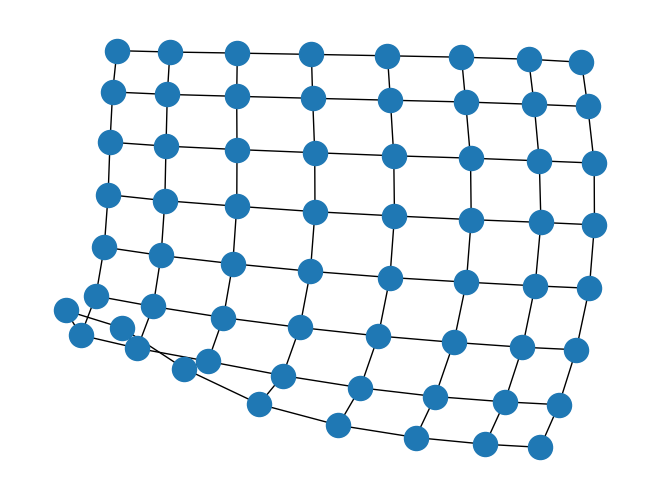

In [20]:
def Adjgrid(n):
    return np.array([[]])

G= nx.grid_2d_graph(8,8)


nx.draw(G,pos=nx.spring_layout(G))

***
## <font color=blue>Classical encodings</font> ##
***

**To Do:**

**_question 1_**

_**using no loop**_, write down an algorithm mimicking nx.info and which takes as an input the adjacency matrix of $G$.

The resulting text must include:
* the number of vertices
* the number of edges
* the list of degree of each vertex

Hint: use the algebraic properties of the matrix

Give an estimate of the complexity of your algorithms

In [21]:
#reference from networkx
G=nx.from_numpy_array(B)
print(nx.info(G))

AttributeError: module 'networkx' has no attribute 'info'

In [12]:
def info(A):
    """
    Return some informations about an adjacency matrix.

    :param A: the adjacency matrix
    :type A: a matrix (two dimensionnal array) containing only integers
    :return: the number of vertices (int), the number of edges (int) and a list of degree (table of int)
    :rtype: int, int, table of int
    """
    vertNum=A.shape[0],
    arcNum=np.dot(A,np.ones((A.shape[0],1)))
    degList=arcNum.size/2
    return [vertNum,arcNum,degList]
    
A=np.array([[0 , 1 , 0 , 0 , 0 ],[1 , 0 , 1 , 1 , 0 ],[0 , 1 , 0 , 1 , 0 ],[0 , 1 , 1 , 0 , 1 ],[0 , 0 , 0 , 1 , 0]])
info(A)
    

[(5,),
 array([[1.],
        [3.],
        [2.],
        [3.],
        [1.]]),
 2.5]

*****
**To Do:**


**_question 2_**

Create algorithms that convert addjacency matrix/to-from/incidence matrix.


Test your algorithms on a few examples


In [7]:
def adjacencyToIncidence(A):
    """
         Return the incidence matrix from an adjacency matrix.
 
        :param A: the adjacency matrix
        :type A: a matrix (two dimensionnal array) containing only integers
        :return:  the incidence matrix
        :rtype: a matrix (two dimensionnal array) containing only integers
    """    
    incidence=np.zero_like()

    return -1

adjacencyToIncidence(A)

number of vertices: 5
number of edges: 5
degree list: [1 3 2 3 1]


array([[1, 1, 0, 0, 0],
       [0, 1, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [0, 0, 1, 1, 0],
       [0, 0, 0, 1, 1]])

***
## <font color=blue>Havel-Hakimi Algorithm and degree sequence</font> ##
***


The aim of this part is to give a complete characterisation of admissible degree sequences

The _Havel-Hakimi Algorithm_  ([Havel, 1955] and [Hakimi, 1962]) works as follows:
given $d=(d_0,d_1,\dots,d_{n-1})$ a potential list of degree of a graph (sorted in decreasing order)
* if $d$ contains only $0$ then $d$ is __graphic__
* if $d$ has a negative value then $d$ is _not_ __graphic__
* if $d_0$ is larger thant the length of $d$  then $d$ is _not_ __graphic__
* otherwise, $d$ is graphic iff the list $d'=(d_1-1,d_2-1,d_3-1,\dots,d_{d_0}-1,d_{d_0+1},d_{d_0+2},\dots,d_{n-1})$ is graphical



***
***
**To Do:**

**_question 3_**

Using Havel-Hakimi algorithm, determine weither the sequence $(5,2,1)$, $(3,3,2,1,1)$, and $(3,3,1,1)$ are graphic or not.
***

**To Do:**

**_question 4_**

Implement this algorithm and test it on a few examples

***

**To Do:**

**_question 5_**

Justify the algorithm by giving a construction showing that, if $(d_1-1,d_2-1,d_3-1,\dots,d_{d_0}-1,d_{d_0+1},\dots,d_{n-1})$ is graphic, then so is $d=(d_0,d_1,\dots,d_{n-1})$.

In [11]:
# Python implementation of the Havel-Hakimi Algorithm
  

def graphExists(a): 
    """
        Return true if a simple graph exist
 
        :param a: a sequence
        :type a:  an array of int
        :return:  true if a simple graph exist, false otherwise
        :rtype: a boolean
    """  
    return True
  
# examples
a = [3, 3, 2,2] 
print(graphExists(a))
a = [3] 
print(graphExists(a))
a = [5,4,1,1,1] 
print(graphExists(a))
a = [4,4,4,4,4,4,4,4,4,4,4,4,4,4,4] 
graphExists(a)




True
False
False


True

**Bonus:**

Given a (graphic) sequence, and using Havel-Hakimi Algorithm as source of inspiration, write an algorithm creating a graph corresponding to this sequence. 